In [1]:
import pandas as pd
import warnings
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [3]:
data=pd.read_csv('creditcard.csv')

In [ ]:
data.head()

In [4]:
data.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [5]:
X=data.drop(['Class'], axis=1)
Y=data['Class']

In [10]:
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier(criterion='entropy', splitter='best')
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9989536752325323


In [11]:
test_size=0.3
seed=100
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='lbfgs', tol=0.1, C=0.001)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
acc = accuracy_score(Y_test, predicted)
cm = confusion_matrix(Y_test, predicted)
print(cm)
print(report)
print(acc)

[[85266    35]
 [   67    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.68      0.53      0.60       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.84      0.76      0.80     85443
weighted avg       1.00      1.00      1.00     85443

0.9988062216916541


c:\users\vipul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


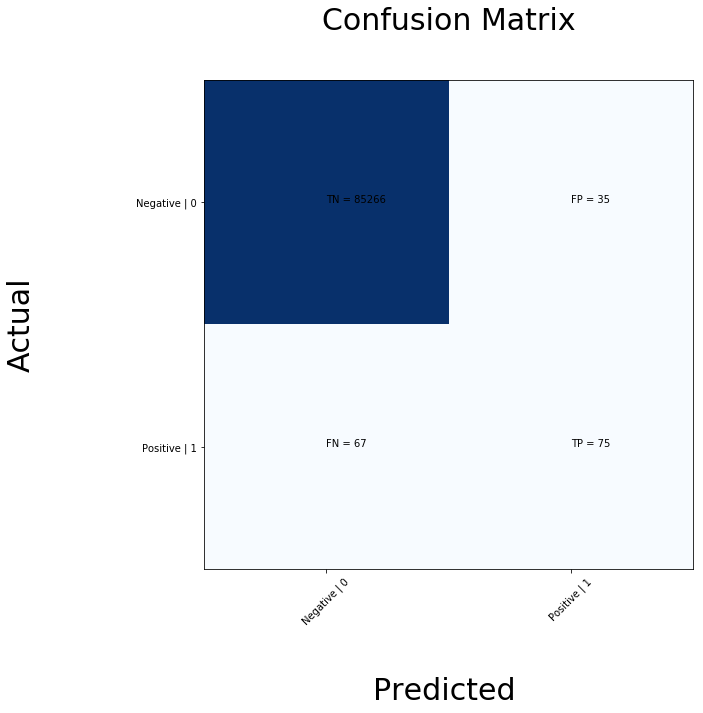

In [12]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative | 0','Positive | 1']
plt.title('Confusion Matrix', fontsize=30 ,pad=50 )
plt.ylabel('Actual' , labelpad=100 , fontsize=30)
plt.xlabel('Predicted ', labelpad=50 , fontsize=30)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [13]:
def makeOverSamplesADASYN(X,Y):
    from imblearn.over_sampling import ADASYN 
    sm = ADASYN()
    X, Y = sm.fit_sample(X, Y)
    return(X,Y)


def makeunderoverSample(X,Y):
    from imblearn.combine import SMOTEENN
    sm = SMOTEENN(random_state=0)
    X, Y = sm.fit_resample(X, Y)
    return(X,Y)

X , Y = makeunderoverSample(X, Y)

In [14]:
def count1(Y):
    countzero=0
    countone=0
    for i in range(0,len(Y)):
        if Y[i]==0:
            countzero=countzero+1
        elif Y[i]==1:
            countone=countone+1
    return countzero,countone

class0, class1 = count1(Y)

In [15]:
print(class0,class1)

265482 275801


In [16]:
test_size=0.3
seed=100
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='lbfgs', tol=0.1, C=0.001)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
acc = accuracy_score(Y_test, predicted)
cm = confusion_matrix(Y_test, predicted)
print(cm)
print(report)
print(acc)

[[76916  2433]
 [ 4200 78836]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     79349
           1       0.97      0.95      0.96     83036

   micro avg       0.96      0.96      0.96    162385
   macro avg       0.96      0.96      0.96    162385
weighted avg       0.96      0.96      0.96    162385

0.9591526310927734


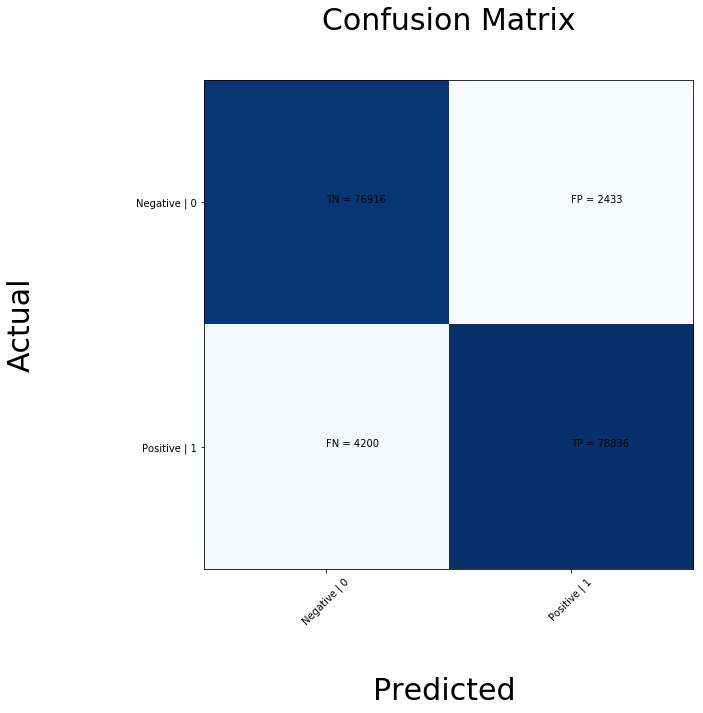

In [17]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative | 0','Positive | 1']
plt.title('Confusion Matrix', fontsize=30 ,pad=50 )
plt.ylabel('Actual' , labelpad=100 , fontsize=30)
plt.xlabel('Predicted ', labelpad=50 , fontsize=30)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()